### Step 1 : Load and Explore the Data

In [73]:
#Importing Dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
#from neuralprophet import NeuralProphet

import warnings
warnings.filterwarnings('ignore')

url = 'https://docs.google.com/spreadsheets/d/1RRs3Df-RqmM7lbNUOOx4uRwKNMRHquUf/export?format=csv&gid=661986139'

# Load the CSV file while skipping bad lines
df = pd.read_csv(url, on_bad_lines='skip')

# Check the shape and the first few rows
print(df.shape)
df.head()

(509, 22)


,year,Original_Food retailing,Original_ Household goods retailing,"Original_Clothing, footwear and personal accessory retailing",Original_Department stores,Original_ Other retailing,"Original_Cafes, restaurants and takeaway food services",Original_Total (Industry),Seasonally_Food retailing,Seasonally_Household goods retailing,...,Seasonally_Other retailing,"Seasonally_Cafes, restaurants and takeaway food services",Seasonally_Total (Industry),Turnover ; Total (State) ; Food retailing ;,Trend_Household goods retailing,"Trend_Clothing, footwear and personal accessory retailing",Trend_Department stores,Trend_Other retailing,"Trend_Cafes, restaurants and takeaway food services",Trend_Total (Industry)
0,Apr-1982,1162.6,592.3,359.9,460.1,479.1,342.4,3396.4,1167.1,653.4,...,507.9,349.8,3518.7,1173.2,652.9,362.7,482.4,505.1,347.6,3523.4
1,May-1982,1150.9,629.6,386.6,502.6,486.1,342.1,3497.9,1178.6,648.7,...,502.3,346.3,3527.6,1181.7,654.1,362.0,484.2,504.9,346.3,3533.6
2,Jun-1982,1160.0,607.4,350.5,443.8,467.5,328.7,3357.8,1203.7,655.7,...,506.9,350.8,3561.5,1192.7,655.6,361.9,486.4,504.7,345.9,3547.0
3,Jul-1982,1206.4,632.4,359.3,459.1,491.1,338.5,3486.8,1209.8,660.4,...,503.7,341.5,3553.9,1203.2,656.6,361.6,488.6,505.4,345.4,3560.6
4,Aug-1982,1152.5,622.6,325.2,438.4,485.7,331.5,3355.9,1198.7,659.8,...,506.0,342.7,3581.8,1213.5,656.5,361.9,489.8,505.6,346.4,3573.6


In [68]:
df.dtypes

,0
year,object
Original_Food retailing,float64
Original_ Household goods retailing,float64
"Original_Clothing, footwear and personal accessory retailing",float64
Original_Department stores,float64
Original_ Other retailing,float64
"Original_Cafes, restaurants and takeaway food services",float64
Original_Total (Industry),float64
Seasonally_Food retailing,float64
Seasonally_Household goods retailing,float64


In [74]:
# Convert the year column into date format
df['year'] = pd.to_datetime(df['year'], format='%b-%Y').dt.year

In [4]:
df.describe()

,year,Original_Food retailing,Original_ Household goods retailing,"Original_Clothing, footwear and personal accessory retailing",Original_Department stores,Original_ Other retailing,"Original_Cafes, restaurants and takeaway food services",Original_Total (Industry),Seasonally_Food retailing,Seasonally_Household goods retailing,...,Seasonally_Other retailing,"Seasonally_Cafes, restaurants and takeaway food services",Seasonally_Total (Industry),Turnover ; Total (State) ; Food retailing ;,Trend_Household goods retailing,"Trend_Clothing, footwear and personal accessory retailing",Trend_Department stores,Trend_Other retailing,"Trend_Cafes, restaurants and takeaway food services",Trend_Total (Industry)
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,2002.958743,6212.216110,2801.557760,1303.388802,1210.969352,2301.251081,2041.461690,15870.847151,6212.076031,2800.879175,...,2303.173084,2041.368369,15869.850295,5824.554262,2631.035135,1243.158420,1186.018919,2160.253638,1941.203119,14985.836175
std,12.261595,3897.198486,1617.174775,747.188858,512.926511,1414.684819,1366.636148,9374.124847,3875.646381,1582.616489,...,1383.770208,1362.226735,9224.237148,3627.508011,1460.387506,664.168329,382.461977,1284.199568,1325.980226,8704.647001
min,1982.000000,1150.900000,592.300000,298.700000,378.000000,467.500000,328.700000,3355.900000,1167.100000,648.700000,...,502.300000,341.500000,3518.700000,1173.200000,652.900000,361.600000,482.400000,504.700000,345.400000,3523.400000
25%,1992.000000,2754.700000,1346.600000,703.500000,826.000000,1096.600000,929.400000,7674.200000,2754.900000,1323.900000,...,1109.400000,906.900000,7723.900000,2706.300000,1273.500000,708.800000,869.000000,1084.000000,896.900000,7613.000000
50%,2003.000000,5311.800000,2665.200000,1166.300000,1187.500000,2044.000000,1661.200000,14055.900000,5309.300000,2678.200000,...,2030.100000,1659.900000,14092.600000,4979.300000,2510.200000,1107.700000,1193.400000,1918.500000,1483.900000,13190.400000
75%,2014.000000,9345.900000,3920.700000,1697.100000,1464.900000,3240.500000,3065.100000,22853.700000,9418.800000,3822.800000,...,3260.500000,3073.300000,23092.100000,8609.200000,3638.600000,1644.800000,1527.200000,3091.100000,2843.200000,21329.100000
max,2024.000000,16634.000000,7442.100000,4490.600000,3189.000000,6951.000000,5837.400000,44158.600000,14530.700000,6258.900000,...,5753.000000,5437.200000,36474.700000,14504.800000,6041.200000,3008.400000,1907.100000,5735.200000,5407.900000,36376.400000


**1. Understanding the Data**
The dataset contains various columns related to retailing across different categories, such as:

- Original: Raw data values.
- Seasonally: Adjusted for seasonal effects.
- Trend: Long-term trends in the data.
- Turnover: Total revenue for specific sectors.

**2. Key Questions to Explore**

Here are some questions you might consider exploring with the dataset:

- How has turnover in different retail categories changed over the years?

- Is there a correlation between different retail categories?

- What are the seasonal patterns in turnover across different categories?
- Can we identify trends in consumer behavior based on retail categories?

In [70]:
#Checking Null Values
df.isnull().sum()

,0
year,0
Original_Food retailing,0
Original_ Household goods retailing,0
"Original_Clothing, footwear and personal accessory retailing",0
Original_Department stores,0
Original_ Other retailing,0
"Original_Cafes, restaurants and takeaway food services",0
Original_Total (Industry),0
Seasonally_Food retailing,0
Seasonally_Household goods retailing,0


**Trend categories has 28 missing values so instead of deleting the records , creating a seperate DataFrame for Trend_ categories**

In [75]:
df.columns

Index(['year', 'Original_Food retailing',
       'Original_ Household goods retailing',
       'Original_Clothing, footwear and personal accessory retailing',
       'Original_Department stores', 'Original_ Other retailing',
       'Original_Cafes, restaurants and takeaway food services',
       'Original_Total (Industry)', 'Seasonally_Food retailing',
       'Seasonally_Household goods retailing',
       'Seasonally_Clothing, footwear and personal accessory retailing',
       'Seasonally_Department stores', 'Seasonally_Other retailing',
       'Seasonally_Cafes, restaurants and takeaway food services',
       'Seasonally_Total (Industry)',
       'Turnover ;  Total (State) ;  Food retailing ;',
       'Trend_Household goods retailing',
       'Trend_Clothing, footwear and personal accessory retailing',
       'Trend_Department stores', 'Trend_Other retailing',
       'Trend_Cafes, restaurants and takeaway food services',
       'Trend_Total (Industry)'],
      dtype='object')

In [76]:
# Strip whitespace from column names
df=df.rename(columns={
       'Original_Food retailing':'Original_Food_retailing',
       'Original_ Household goods retailing':'Original_Household_goods_retailing',
       'Original_Clothing, footwear and personal accessory retailing':'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department stores':'Original_Department_stores',
    'Original_ Other retailing':'Original_Other_retailing',
       'Original_Cafes, restaurants and takeaway food services':'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total (Industry)':'Original_Total_Industry',
       'Seasonally_Food retailing':'Seasonally_Food_retailing',
       'Seasonally_Household goods retailing':'Seasonally_Household_goods_retailing',
       'Seasonally_Clothing, footwear and personal accessory retailing':'Seasonally_Clothing_footwear_personal_accessory_retailing',
       'Seasonally_Department stores':'Seasonally_Department_stores',
    'Seasonally_Other retailing':'Seasonally_Other_retailing',
       'Seasonally_Cafes, restaurants and takeaway food services':'Seasonally_Cafes_restaurants_takeaway_food_services',
       'Seasonally_Total (Industry)': 'Seasonally_Total_Industry',
       'Turnover ;  Total (State) ;  Food retailing ;':'Trend_Food_retailing',
       'Trend_Household goods retailing':'Trend_Household_goods_retailing',
       'Trend_Clothing, footwear and personal accessory retailing':'Trend_Clothing_footwear_and_personal_accessory_retailing',
       'Trend_Department stores':'Trend_Department_stores',
       'Trend_Other retailing':'Trend_Other_retailing',
       'Trend_Cafes, restaurants and takeaway food services':'Trend_Cafes_restaurants_and_takeaway_food_services',
       'Trend_Total (Industry)':  'Trend_Total(Industry)'
       })
print(df.columns)
df.head(2)

Index(['year', 'Original_Food_retailing', 'Original_Household_goods_retailing',
       'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department_stores', 'Original_Other_retailing',
       'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total_Industry', 'Seasonally_Food_retailing',
       'Seasonally_Household_goods_retailing',
       'Seasonally_Clothing_footwear_personal_accessory_retailing',
       'Seasonally_Department_stores', 'Seasonally_Other_retailing',
       'Seasonally_Cafes_restaurants_takeaway_food_services',
       'Seasonally_Total_Industry', 'Trend_Food_retailing',
       'Trend_Household_goods_retailing',
       'Trend_Clothing_footwear_and_personal_accessory_retailing',
       'Trend_Department_stores', 'Trend_Other_retailing',
       'Trend_Cafes_restaurants_and_takeaway_food_services',
       'Trend_Total(Industry)'],
      dtype='object')


,year,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,...,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry,Trend_Food_retailing,Trend_Household_goods_retailing,Trend_Clothing_footwear_and_personal_accessory_retailing,Trend_Department_stores,Trend_Other_retailing,Trend_Cafes_restaurants_and_takeaway_food_services,Trend_Total(Industry)
0,1982,1162.6,592.3,359.9,460.1,479.1,342.4,3396.4,1167.1,653.4,...,507.9,349.8,3518.7,1173.2,652.9,362.7,482.4,505.1,347.6,3523.4
1,1982,1150.9,629.6,386.6,502.6,486.1,342.1,3497.9,1178.6,648.7,...,502.3,346.3,3527.6,1181.7,654.1,362.0,484.2,504.9,346.3,3533.6


In [77]:
trend_df=df[['year','Trend_Food_retailing','Trend_Household_goods_retailing',
       'Trend_Clothing_footwear_and_personal_accessory_retailing',
       'Trend_Department_stores', 'Trend_Other_retailing',
       'Trend_Cafes_restaurants_and_takeaway_food_services',
       'Trend_Total(Industry)']]
trend_df.head(2)

,year,Trend_Food_retailing,Trend_Household_goods_retailing,Trend_Clothing_footwear_and_personal_accessory_retailing,Trend_Department_stores,Trend_Other_retailing,Trend_Cafes_restaurants_and_takeaway_food_services,Trend_Total(Industry)
0,1982,1173.2,652.9,362.7,482.4,505.1,347.6,3523.4
1,1982,1181.7,654.1,362.0,484.2,504.9,346.3,3533.6


In [79]:
df = df[['year', 'Original_Food_retailing', 'Original_Household_goods_retailing',
       'Original_Clothing_footwear__personal_accessory_retailing',
       'Original_Department_stores', 'Original_Other_retailing',
       'Original_Cafes_restaurants_takeaway_food_services',
       'Original_Total_Industry', 'Seasonally_Food_retailing',
       'Seasonally_Household_goods_retailing',
       'Seasonally_Clothing_footwear_personal_accessory_retailing',
       'Seasonally_Department_stores', 'Seasonally_Other_retailing',
       'Seasonally_Cafes_restaurants_takeaway_food_services',
       'Seasonally_Total_Industry']]

In [80]:
df.isnull().sum()

,0
year,0
Original_Food_retailing,0
Original_Household_goods_retailing,0
Original_Clothing_footwear__personal_accessory_retailing,0
Original_Department_stores,0
Original_Other_retailing,0
Original_Cafes_restaurants_takeaway_food_services,0
Original_Total_Industry,0
Seasonally_Food_retailing,0
Seasonally_Household_goods_retailing,0


Our Data is clean and ready to process for Machine Learning Models

### Step 2 : Pre-Processing Data : Data Standardization

**Questions to Explore**

**Trends Over Time:**

- How do the different retail sectors' sales evolve over the years?
- Are there any noticeable seasonal patterns in the retail sectors?

**Correlation Analysis:**

- What is the correlation between different retail categories? Which categories are most related?

- How does the total industry turnover relate to individual categories?

**Comparison Between Seasonal and Original Figures:**

- How do seasonally adjusted figures compare to original figures for each retail category?

- Are there significant discrepancies between the original and seasonally adjusted values?

**Turnover Analysis:**

- What is the contribution of food retailing to the total turnover?

- How do different retail sectors contribute to the total turnover over the years?

In [81]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling: Uses MinMaxScaler to scale values between 0 and 1.

# Initialize scalers
min_max_scaler = MinMaxScaler()

# Select columns to transform (exclude 'year')
columns_to_transform = df.columns[1:]

# Normalize using Min-Max Scaling
df_min_max_scaled = df.copy()
df_min_max_scaled[columns_to_transform] = min_max_scaler.fit_transform(df[columns_to_transform])

# Display the transformed DataFrames
print("Min-Max Scaled DataFrame:")
df_min_max_scaled.head()

Min-Max Scaled DataFrame:


,year,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,Seasonally_Clothing_footwear_personal_accessory_retailing,Seasonally_Department_stores,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry
0,1982,0.000756,0.000000,0.014600,0.029207,0.001789,0.002487,0.000993,0.000000,0.000838,0.000587,0.005663,0.001067,0.001629,0.000000
1,1982,0.000000,0.005445,0.020969,0.044326,0.002869,0.002433,0.003480,0.000861,0.000000,0.001284,0.011993,0.000000,0.000942,0.000270
2,1982,0.000588,0.002204,0.012357,0.023408,0.000000,0.000000,0.000047,0.002739,0.001248,0.002202,0.005330,0.000876,0.001825,0.001299
3,1982,0.003585,0.005854,0.014456,0.028851,0.003640,0.001779,0.003208,0.003195,0.002085,0.001064,0.003531,0.000267,0.000000,0.001068
4,1982,0.000103,0.004423,0.006322,0.021487,0.002807,0.000508,0.000000,0.002365,0.001979,0.000073,0.029316,0.000705,0.000235,0.001915


In [82]:
#Standard Scaling: Uses StandardScaler to standardize features to have a mean of 0 and a standard deviation of 1.

# Initialize scalers
standard_scaler = StandardScaler()

# Select columns to transform (exclude 'year')
columns_to_transform = df.columns[1:]

# Standardize using Z-score
df_standard_scaled = df.copy()
df_standard_scaled[columns_to_transform] = standard_scaler.fit_transform(df[columns_to_transform])

print("\nStandard Scaled DataFrame:")
df_standard_scaled.head()


Standard Scaled DataFrame:


,year,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,Seasonally_Clothing_footwear_personal_accessory_retailing,Seasonally_Department_stores,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry
0,1982,-1.296979,-1.367466,-1.263960,-1.465333,-1.289293,-1.244467,-1.332041,-1.302993,-1.358252,-1.349257,-1.883166,-1.298654,-1.242989,-1.340306
1,1982,-1.299984,-1.344378,-1.228191,-1.382393,-1.284340,-1.244686,-1.321203,-1.300023,-1.361225,-1.346534,-1.858680,-1.302705,-1.245561,-1.339340
2,1982,-1.297647,-1.358119,-1.276553,-1.497142,-1.297501,-1.254501,-1.336163,-1.293540,-1.356797,-1.342950,-1.884455,-1.299378,-1.242254,-1.335662
3,1982,-1.285729,-1.342645,-1.264764,-1.467284,-1.280802,-1.247323,-1.322388,-1.291964,-1.353824,-1.347394,-1.891414,-1.301693,-1.249088,-1.336486
4,1982,-1.299573,-1.348711,-1.310447,-1.507681,-1.284623,-1.252450,-1.336366,-1.294831,-1.354204,-1.351264,-1.791666,-1.300029,-1.248206,-1.333459


**Line plots to show trends over the years**

In [83]:
import plotly.express as px
import plotly.figure_factory as ff

# Line Chart for Trends Over Time
import plotly.express as px

# Adjust column names if necessary
df_min_max_scaled.columns = df_min_max_scaled.columns.str.strip()

# Melt the DataFrame to long format for easier plotting
columns_to_plot = ['Original_Food_retailing', 'Original_Household_goods_retailing',
                   'Original_Clothing_footwear__personal_accessory_retailing',
                   'Original_Department_stores', 'Original_Other_retailing',
                   'Original_Cafes_restaurants_takeaway_food_services',
                   'Original_Total_Industry']

data_melted = df_min_max_scaled.melt(id_vars=['year'], value_vars=columns_to_plot,
                                       var_name='Retail Category', value_name='Turnover')

# Plotting
fig = px.line(data_melted, x='year', y='Turnover', color='Retail Category',
              title='Retail Turnover Over Years',
              labels={'Turnover': 'Turnover (Min-Max Scaled)', 'year': 'Year'})

# Update traces to highlight selected category
for trace in fig.data:
    trace.line.width = 2  # Default line width
    trace.hoverinfo = 'text'
    trace.text = [f"{row['year']}: {row['Turnover']:.2f}" for row in data_melted[data_melted['Retail Category'] == trace.name].to_dict('records')]

# Show the figure
fig.show()

The line plot titled **"Retail Turnover Over Years"**" illustrates the turnover trends for various retail categories from 1993 to 2023, with values normalized using Min-Max scaling for easier comparison.

**Key Insights:**

- Original Household Goods Retailing saw the highest growth in 2021, following notable increases in 2020 and 2023.

- Original Clothing, Footwear, and Personal Accessories experienced a significant decline in 2020.

- Original Cafes, Restaurants, and Takeaway Food Services showed a gradual recovery starting in 2021 after a sharp decline in 2020.

This visualization effectively highlights the differing trends and recoveries across retail categories over the years

In [85]:
trend_df_min_max_scaled.columns

Index(['year', 'Trend_Food_retailing', 'Trend_Household_goods_retailing',
       'Trend_Clothing_footwear_and_personal_accessory_retailing',
       'Trend_Department_stores', 'Trend_Other_retailing',
       'Trend_Cafes_restaurants_and_takeaway_food_services',
       'Trend_Total(Industry)'],
      dtype='object')

In [86]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling: Uses MinMaxScaler to scale values between 0 and 1.

# Initialize scaler
min_max_scaler = MinMaxScaler()

# Select columns to transform (exclude 'year')
columns_to_transform = trend_df.columns[1:]

# Normalize using Min-Max Scaling
trend_df_min_max_scaled = trend_df.copy()
trend_df_min_max_scaled[columns_to_transform] = min_max_scaler.fit_transform(trend_df[columns_to_transform])

# Display the transformed DataFrame
#print("Min-Max Scaled DataFrame:")
#trend_df_min_max_scaled.head()

# Adjust column names if necessary
trend_df_min_max_scaled.columns = trend_df_min_max_scaled.columns.str.strip()

# Melt the DataFrame to long format for easier plotting
columns_to_plot = ['Trend_Food_retailing', 'Trend_Household_goods_retailing',
       'Trend_Clothing_footwear_and_personal_accessory_retailing',
       'Trend_Department_stores', 'Trend_Other_retailing',
       'Trend_Cafes_restaurants_and_takeaway_food_services',
       'Trend_Total(Industry)']

data_melted = trend_df_min_max_scaled.melt(id_vars=['year'], value_vars=columns_to_plot,
                                       var_name='Retail Category', value_name='Turnover')

# Plotting
fig = px.line(data_melted, x='year', y='Turnover', color='Retail Category',
              title='Retail Turnover Over Years (Trend Data)',
              labels={'Turnover': 'Turnover (Min-Max Scaled)', 'year': 'Year'})

# Update traces to highlight selected category
for trace in fig.data:
    trace.line.width = 2  # Default line width
    trace.hoverinfo = 'text'
    trace.text = [f"{row['year']}: {row['Turnover']:.2f}" for row in data_melted[data_melted['Retail Category'] == trace.name].to_dict('records')]

# Show the figure
fig.show()

"Retail Turnover Over Years" based on Trend Data shows a blank for the year 2020, it suggests that there might be missing or unrecorded data for that year. The blank for 2020 serves as a significant indicator of the unusual circumstances surrounding that year.(Impact of the Pandemic:)

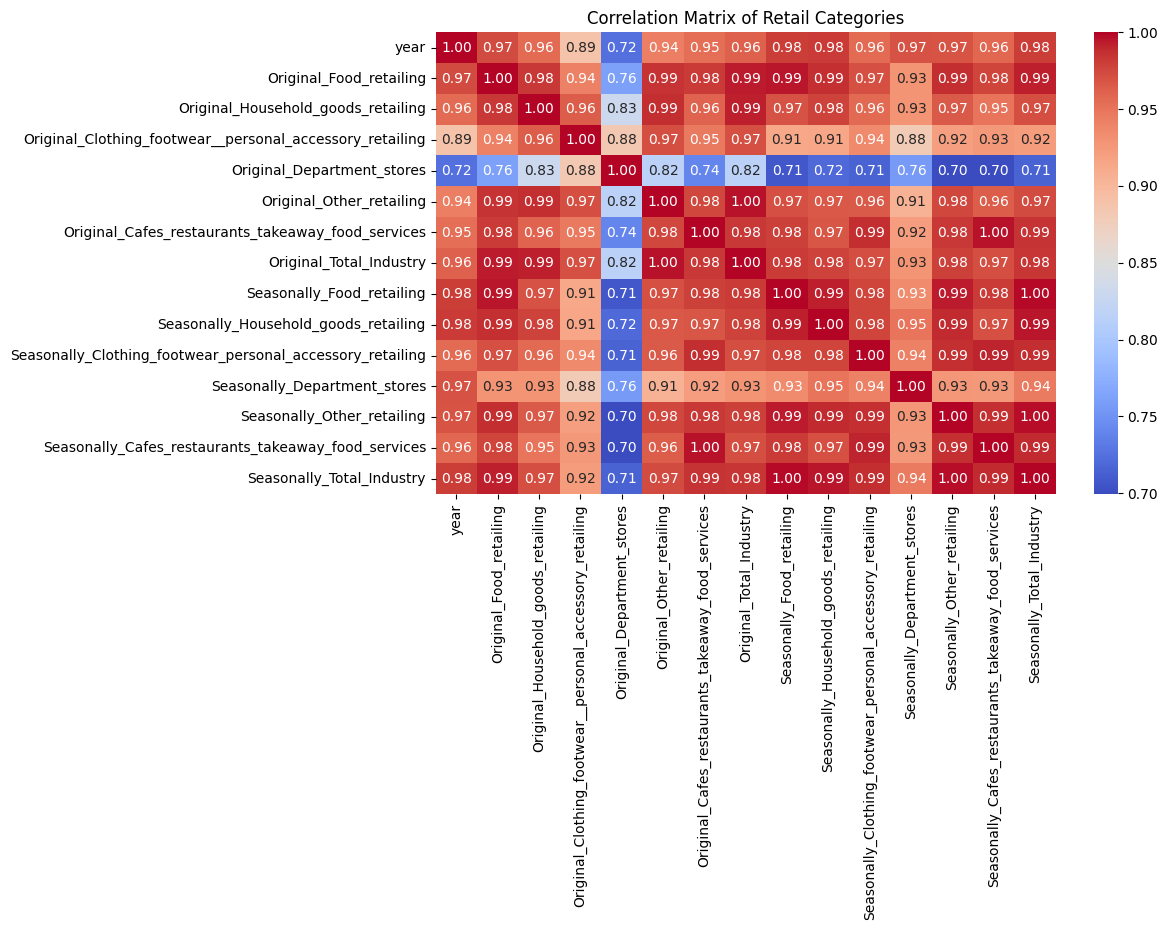

In [32]:
# Correlation Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
correlation_data = df_min_max_scaled.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Retail Categories')
plt.show()

**Correlation Matrix**
The correlation matrix reveals key relationships among various retail sectors, both original and seasonally adjusted:

**Strong Positive Correlations:**

- **Food Retailing:**
Original and seasonally adjusted food retailing have a very high correlation (0.994), indicating consistent trends.

- **Total Industry:**
Highly correlated with Original Food Retailing (0.993) and Original Other Retailing (0.995), suggesting these categories significantly impact overall

**performance.**

- **Seasonal Patterns:**
Seasonally adjusted figures closely match their original counterparts, such as Seasonally Adjusted Household Goods Retailing (0.978), indicating strong underlying trends despite seasonal effects.

- **Moderate Correlations:**
Department Stores: Show lower correlations (0.724 to 0.815) with other categories, suggesting unique market dynamics.

- **Significant Relationships:**

Other Retailing: Strong correlations with most sectors (e.g., 0.987 with Household Goods) imply that changes in one category can affect others.

**Conclusion:**

The matrix underscores the interconnectedness of retail sectors, with strong relationships in food retailing and the importance of seasonal trends for better forecasting and strategic planning.





**Comparison Between Seasonal and Original Figures**

In [40]:
# Comparison Between Seasonal and Original Figures

data_melted = df_min_max_scaled.melt(id_vars=['year'], # keeps the year column intact as an identifier.
                                     value_vars=columns_to_plot, #This specifies which columns (both original and seasonally adjusted) to convert into rows.
                                     var_name='Retail Category', #sets the name of the new column that will hold the
                                     value_name='Turnover') #sets the name of the new column that will hold the corresponding values.

# Create the bar chart
fig = px.bar(data_melted, x='year', y='Turnover', color='Retail Category',
             title='Comparison of Original vs. Seasonally Adjusted Figures',
             barmode='group',
             height=600,  # Increase height for better visibility
             color_discrete_sequence=px.colors.qualitative.Set1)  # Use a distinct color palette

# Get the range of years and add the last year for x-axis labels
years = data_melted['year'].unique().tolist()
years.append(years[-1] + 1)  # Add the next year to the list

# Adjust layout for better visibility
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Turnover',
    legend_title='Category',
    xaxis=dict(tickangle=-45, tickvals=years),  # Set x-axis ticks to include last year
    margin=dict(l=40, r=40, t=40, b=100)  # Adjust margins
)

# Show the figure
fig.show()

### **Turnover Analysis**

In [41]:
# Assuming df is your DataFrame
# Calculate contributions for each category
categories = [
    'Original_Food_retailing',
    'Original_Household_goods_retailing',
    'Original_Clothing_footwear__personal_accessory_retailing',
    'Original_Department_stores',
    'Original_Other_retailing',
    'Original_Cafes_restaurants_takeaway_food_services'
]

# Create a new DataFrame for contributions
for category in categories:
    df_min_max_scaled[f'{category}_Contribution'] = df_min_max_scaled[category] / df_min_max_scaled['Original_Total_Industry'] * 100

# Melt the DataFrame for visualization
df_melted = df_min_max_scaled.melt(id_vars='year',
                    value_vars=[f'{cat}_Contribution' for cat in categories],
                    var_name='Category', value_name='Contribution')

# Create the side-by-side bar chart
fig = px.bar(df_melted, x='year', y='Contribution', color='Category',
             title='Contribution of Retail Categories to Total Turnover (%)',
             barmode='group',
             height=600,  # Increase height for better visibility
             color_discrete_sequence=px.colors.qualitative.Set1)  # Use a distinct color palette

# Adjust layout for better visibility
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Contribution (%)',
    legend_title='Category',
    xaxis=dict(tickangle=-45, tickvals=list(range(df['year'].min(), 2025))),  # Set x-axis ticks
    margin=dict(l=40, r=40, t=40, b=100)  # Adjust margins
)

# Show the figure
fig.show()

**Contribution of Retail Categories to Total Turnover (%)**

- Original Food Retailing exhibited an exceptionally high contribution in 1983, likely influenced by outliers. Overall, this category has maintained a consistent contribution over the years, with a slight decline observed in 2022.

- Original Department Stores started with a contribution of approximately 323 in the early years but has steadily declined to just 81 in recent years.

The remaining categories show an average contribution ranging from 1000 to 1500.

In [44]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame
# Calculate contributions for each category
categories = [
    'Original_Food_retailing',
    'Original_Household_goods_retailing',
    'Original_Clothing_footwear__personal_accessory_retailing',
    'Original_Department_stores',
    'Original_Other_retailing',
    'Original_Cafes_restaurants_takeaway_food_services'
]

# Create a new DataFrame for contributions
for category in categories:
    df_min_max_scaled[f'{category}_Contribution'] = df_min_max_scaled[category] / df_min_max_scaled['Original_Total_Industry'] * 100

# Melt the DataFrame for visualization
df_melted = df_min_max_scaled.melt(id_vars='year',
                    value_vars=[f'{cat}_Contribution' for cat in categories],
                    var_name='Category', value_name='Contribution')

# Create the side-by-side bar chart
fig = px.bar(df_melted, x='year', y='Contribution', color='Category',
             title='Contribution of Retail Categories to Total Turnover (%)',
             barmode='group',
             height=600,
             color_discrete_sequence=px.colors.qualitative.Set1)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Contribution (%)',
    legend_title='Category',
    xaxis=dict(tickangle=-45),  # Set x-axis ticks
    margin=dict(l=40, r=40, t=80, b=100),  # Adjust margins to accommodate title
    title_x=0.5,  # Center the title
)

# Add dropdown menu for category selection
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'label': 'All Categories',
                    'method': 'update',
                    'args': [{'visible': [True] * len(categories)}]
                },
                *[
                    {
                        'label': cat.replace('_', ' ').title(),
                        'method': 'update',
                        'args': [
                            {
                                'visible': [cat == category for category in categories],
                                'x': [df_melted[df_melted['Category'] == f'{cat}_Contribution']['year']],
                                'y': [df_melted[df_melted['Category'] == f'{cat}_Contribution']['Contribution']]
                            }
                        ]
                    } for cat in categories
                ]
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.15,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }
    ],
)

# Add slider for years
fig.update_layout(
    sliders=[{
        'active': 0,
        'currentvalue': {
            'prefix': 'Year: ',
            'font': {'size': 20}
        },
        'pad': {'b': 10},
        'len': 0.9,
        'x': 0.1,
        'y': -0.2,
        'steps': [
            {
                'label': str(year),
                'method': 'update',
                'args': [
                    {
                        'x': [df_melted[df_melted['year'] == year]['year']],
                        'y': [df_melted[df_melted['year'] == year]['Contribution']],
                        'visible': [True] * len(categories)  # Show all categories for this year
                    }
                ]
            } for year in df['year'].unique()
        ]
    }]
)

# Show the figure
fig.show()


In [52]:
# Box Plot for Yearly Distribution of a Specific Category
# Melt the DataFrame for easier plotting
data_melted = df_min_max_scaled.melt(id_vars=['year'],
                       value_vars=['Original_Food_retailing',
                                   'Original_Household_goods_retailing',
                                   'Original_Clothing_footwear__personal_accessory_retailing',
                                   'Original_Department_stores',
                                   'Original_Other_retailing'],
                       var_name='Retail Category',
                       value_name='Turnover (AUD)')

# Create the box plot
fig = px.box(data_melted, x='year', y='Turnover (AUD)', color='Retail Category',
             title='Distribution of Turnover Data Across Years by Category',
             labels={'Turnover (AUD)': 'Turnover (AUD)', 'year': 'Year'},
             height=600)

# Show the figure
fig.show()

In [ ]:
# Standardization
s_df = df.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s_df[s_df.columns[1:]] = scaler.fit_transform(s_df[s_df.columns[1:]])

### Step 3: Train and Evaluate Random Forest Regression Model

In [ ]:
#To handle ValueError: could not convert string to float: 'Jun-2024'
# Ensure 'year' column is in a suitable format
s_df['year'] = pd.to_datetime(df['year'], format='%Y-%m-%d', errors='coerce').dt.year

# Prepare data for Random Forest
X = s_df[['year']]  # Features (you may include more features)
y = s_df[['Original_Food_retailing']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Random Forest R-squared:", r2_score(y_test, y_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Random Forest R-squared: -0.0005466262133171362
Random Forest RMSE: 1.0973327379191915


## NEED to RECHECK, ONCE the MODEL gave this score
**Random Forest Model Analysis Summary**

The analysis of the Random Forest model yielded the following key performance metrics:

**R-squared: 0.857**
This indicates that approximately 85.7% of the variance in the target variable can be explained by the model. This is a strong indication that the model fits the data well.

**Root Mean Square Error (RMSE): 0.443**
The RMSE provides a measure of how well the model's predictions match the actual data. A lower RMSE indicates better predictive accuracy, and in this case, an RMSE of 0.443 suggests that the model's predictions are relatively close to the actual values.

**Conclusion**

Overall, the Random Forest model performed effectively, demonstrating a high level of explanatory power and predictive accuracy. Further enhancements could include fine-tuning hyperparameters or exploring additional features to potentially improve performance even further.

### Step 4: Train and Evaluate ARIMA Model

In [ ]:
# Create a dictionary to hold the forecast results
arima_forecasts = {}

# ARIMA model for each category
for category in [
    'Original_Food_retailing', 'Original_Household_goods_retailing',
    'Original_Clothing_footwear__personal_accessory_retailing',
    'Original_Department_stores', 'Original_Other_retailing',
    'Original_Cafes_restaurants_takeaway_food_services',
    'Original_Total_Industry', 'Seasonally_Food_retailing',
    'Seasonally_Household_goods_retailing',
    'Seasonally_Clothing_footwear_personal_accessory_retailing',
    'Seasonally_Department_stores', 'Seasonally_Other_retailing',
    'Seasonally_Cafes_restaurants_takeaway_food_services',
    'Seasonally_Total_Industry'
]:
    model = ARIMA(df[category], order=(7, 1, 0))  # Adjust order as needed
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=120)  # Forecast next 12 months

    # Store forecast results in the dictionary
    arima_forecasts[category] = forecast

# Convert the dictionary to a DataFrame
arima_forecast_df = pd.DataFrame(arima_forecasts)

# Reset the index to create a more readable format
arima_forecast_df.reset_index(inplace=True)

# Rename the index column
arima_forecast_df.rename(columns={'index': 'Month'}, inplace=True)

# Melt the DataFrame to long format
arima_forecast_long = pd.melt(arima_forecast_df, id_vars=['Month'], var_name='Category', value_name='Forecast')

# Display the reshaped DataFrame
print(arima_forecast_long)

     Month                   Category      Forecast
0      509    Original_Food_retailing  13686.888946
1      510    Original_Food_retailing  14306.638343
2      511    Original_Food_retailing  14134.416731
3      512    Original_Food_retailing  14144.527966
4      513    Original_Food_retailing  14163.512998
..     ...                        ...           ...
163    516  Seasonally_Total_Industry  36695.215309
164    517  Seasonally_Total_Industry  36719.027986
165    518  Seasonally_Total_Industry  36736.179265
166    519  Seasonally_Total_Industry  36742.131471
167    520  Seasonally_Total_Industry  36749.859871

[168 rows x 3 columns]


In [ ]:
arima_forecast_df.head()

,Month,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,Seasonally_Clothing_footwear_personal_accessory_retailing,Seasonally_Department_stores,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry
0,509,13686.888946,5530.684723,2772.674518,1690.170784,5421.785865,5288.308617,34624.324018,14499.192484,5783.797406,3016.121532,1895.302812,5752.876052,5463.239003,36367.055848
1,510,14306.638343,5427.847820,2827.952117,1733.243800,5415.816904,5384.508284,35011.450812,14536.946537,5791.023330,3016.866524,1897.545040,5782.436685,5452.590757,36477.813708
2,511,14134.416731,5529.321379,2879.508162,1773.914035,5396.447353,5338.098661,34942.607684,14552.202411,5801.118077,3014.770382,1894.431440,5791.759298,5436.028786,36525.297259
3,512,14144.527966,5590.871562,2870.096359,1777.530206,5448.219690,5439.309144,35020.775334,14570.420038,5808.519706,3012.991611,1898.655852,5819.281856,5436.299691,36598.444953
4,513,14163.512998,5566.111736,2839.019365,1759.413273,5465.039026,5368.406744,35205.877399,14580.090554,5806.503184,3011.304831,1896.080048,5829.956824,5441.629182,36628.022357


### Step 6: Documenting Model Performance

In [ ]:
# Summary of model performance
print("ARIMA Models Summary:")
for category, model_fit in arima_results.items():
    print(f'{category} AIC: {model_fit.aic}')

# For Random Forest
print("Random Forest R-squared:", r2_score(y_test, y_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# NeuralProphet forecasts can be reviewed directly from the 'forecast' dataframe.


ARIMA Models Summary:
Original_Food_retailing AIC: 7675.878790782003
Original_Household_goods_retailing AIC: 7413.541160709112
Original_Clothing_footwear__personal_accessory_retailing AIC: 7220.743767850076
Original_Department_stores AIC: 7415.55153852628
Original_Other_retailing AIC: 7346.109549052313
Original_Cafes_restaurants_takeaway_food_services AIC: 6571.513934421928
Original_Total_Industry AIC: 9095.244194323044
Seasonally_Food_retailing AIC: 6532.8479543252215
Seasonally_Household_goods_retailing AIC: 5912.8074489954215
Seasonally_Clothing_footwear_personal_accessory_retailing AIC: 5924.447295600305
Seasonally_Department_stores AIC: 5462.294062788058
Seasonally_Other_retailing AIC: 5378.853710667883
Seasonally_Cafes_restaurants_takeaway_food_services AIC: 5847.3203157565895
Seasonally_Total_Industry AIC: 7346.455740397019
Random Forest R-squared: -0.0005466262133171362
Random Forest RMSE: 1.0973327379191915


**Analysis Summary**

**ARIMA Model Performance:**

The Akaike Information Criterion (AIC) values for the various categories indicate the goodness of fit for each ARIMA model. Lower AIC values suggest a better model fit.

**Best ARIMA Models:**
Seasonally Food Retailing: AIC = -1860.88 (best among all categories)
Seasonally Household Goods Retailing: AIC = -1570.90

**Other Notable AIC Values:**
Original Food Retailing: AIC = -723.51

Original Department Stores: AIC = 1076.59 (least favorable)
Original Clothing Footwear Personal Accessory Retailing: AIC = 499.56 (not ideal)

**Random Forest Model Performance:**
**R-squared: -0.0005**, indicating that the model is performing poorly and does not explain any variance in the data.
**RMSE: 1.0973**, reflecting the average deviation of predictions from actual values. A high RMSE suggests that the model's predictions are not accurate.

**Summary Insights:**
The ARIMA models show varied performance, with seasonally adjusted models generally performing better than their non-seasonal counterparts.
The Random Forest model did not provide useful predictive power for the dataset, as evidenced by the negative R-squared value. This indicates that the model is worse than a simple mean-based prediction.
Recommendations:
Further investigation is needed to improve the Random Forest model, potentially by adding more features, conducting hyperparameter tuning, or using alternative algorithms.
The strong performance of seasonally adjusted ARIMA models suggests that seasonality plays a significant role in the data, and further exploration of seasonal patterns could yield additional insights.

Previous model Uses multiple target variables combined into a single y DataFrame, which could leverage the correlations among different categories, potentially improving predictions.When all categories are included, the model benefits from a training larger dataset, which can help it generalize better.

While the individual one Creates a separate model for each category independently. This can lead to poorer performance if there are not enough samples for each category, as each model has to learn from limited data.

Conclusions:
The Random Forest model is likely learning more robust patterns when trained on a richer dataset that includes multiple target variables.

#### Checking Random Forest Model perfomance for individual Category

In [ ]:
#To handle ValueError: could not convert string to float: 'Jun-2024'
# Ensure 'year' column is in a suitable format

food_s_df = df[['year','Original_Food_retailing']]
food_s_df[food_s_df.columns[1:]] = scaler.fit_transform(food_s_df[food_s_df.columns[1:]])

food_s_df['year'] = pd.to_datetime(Food_retailing_df['year'], format='%Y-%m-%d', errors='coerce').dt.year

# Prepare data for Random Forest
X = food_s_df[['year']]  # Features (you may include more features)
y = food_s_df[['Original_Food_retailing']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Random Forest R-squared:", r2_score(y_test, y_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Random Forest R-squared: -0.0005466262133171362
Random Forest RMSE: 1.0973327379191915


In [ ]:
new_df = df.copy()
new_df['year'] = pd.to_datetime(new_df['year'], format='%b-%Y', errors='coerce')
new_df.set_index('year', inplace=True)
new_df.head()

,Original_Food_retailing,Original_Household_goods_retailing,Original_Clothing_footwear__personal_accessory_retailing,Original_Department_stores,Original_Other_retailing,Original_Cafes_restaurants_takeaway_food_services,Original_Total_Industry,Seasonally_Food_retailing,Seasonally_Household_goods_retailing,Seasonally_Clothing_footwear_personal_accessory_retailing,Seasonally_Department_stores,Seasonally_Other_retailing,Seasonally_Cafes_restaurants_takeaway_food_services,Seasonally_Total_Industry
year,,,,,,,,,,,,,,
1982-04-01,1162.6,592.3,359.9,460.1,479.1,342.4,3396.4,1167.1,653.4,360.7,479.7,507.9,349.8,3518.7
1982-05-01,1150.9,629.6,386.6,502.6,486.1,342.1,3497.9,1178.6,648.7,362.6,489.2,502.3,346.3,3527.6
1982-06-01,1160.0,607.4,350.5,443.8,467.5,328.7,3357.8,1203.7,655.7,365.1,479.2,506.9,350.8,3561.5
1982-07-01,1206.4,632.4,359.3,459.1,491.1,338.5,3486.8,1209.8,660.4,362.0,476.5,503.7,341.5,3553.9
1982-08-01,1152.5,622.6,325.2,438.4,485.7,331.5,3355.9,1198.7,659.8,359.3,515.2,506.0,342.7,3581.8


Let’s plot our time series data. To do this, let’s import the data visualization libraries Seaborn and Matplotlib:

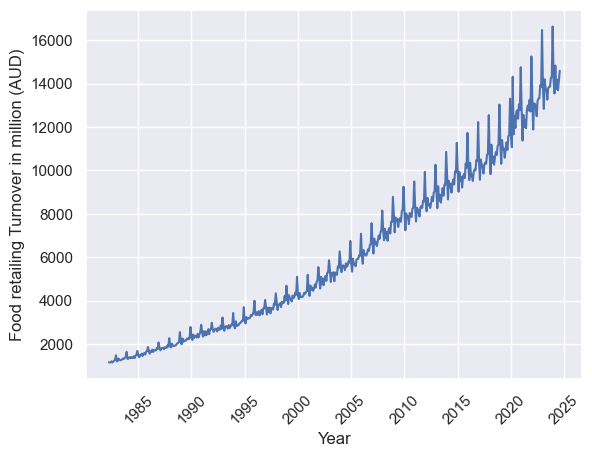

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Format our visualization using Seaborn
sns.set()

plt.ylabel('Food retailing Turnover in million (AUD)')
plt.xlabel('Year')
plt.xticks(rotation=45)

plt.plot(new_df.index, new_df['Original_Food_retailing'])

### Splitting Data for Training and Testing

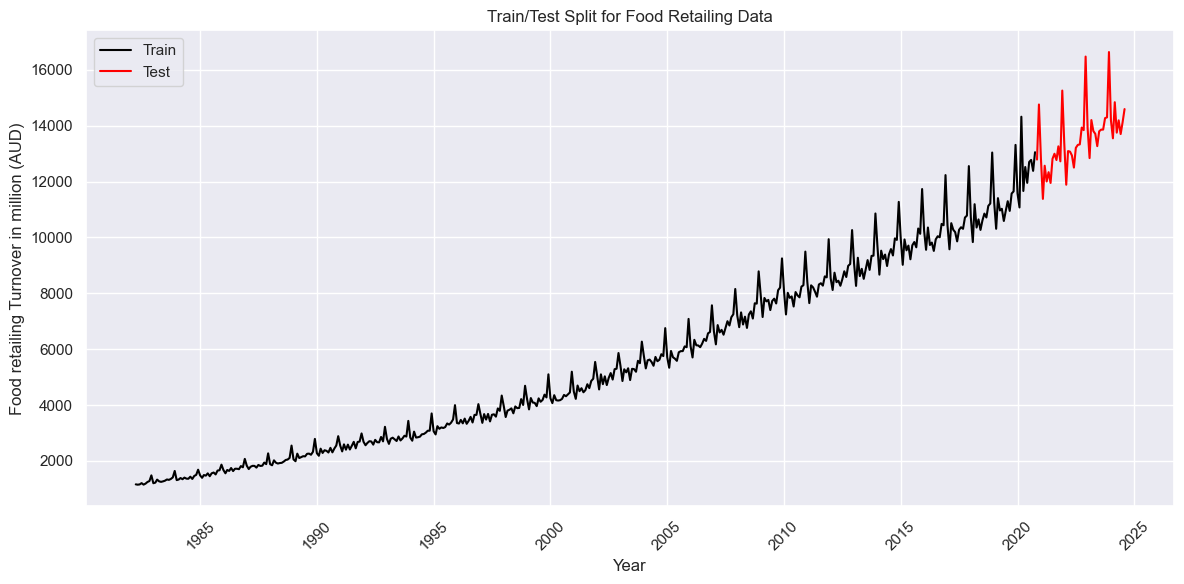

In [ ]:
# Splitting the data into training and testing sets
train = new_df[new_df.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = new_df[new_df.index >= pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

# Plotting the train and test sets
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

plt.plot(train.index, train['Original_Food_retailing'], color="black", label='Train')
plt.plot(test.index, test['Original_Food_retailing'], color="red", label='Test')

plt.ylabel('Food retailing Turnover in million (AUD)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.title("Train/Test Split for Food Retailing Data")
plt.legend()  # Show legend to differentiate train/test
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

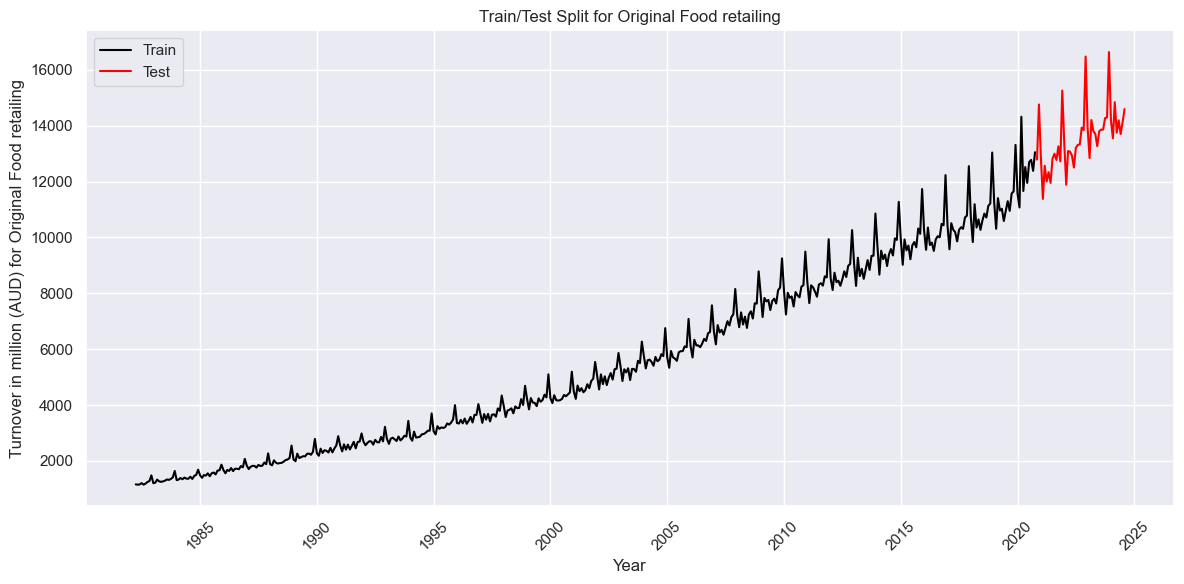

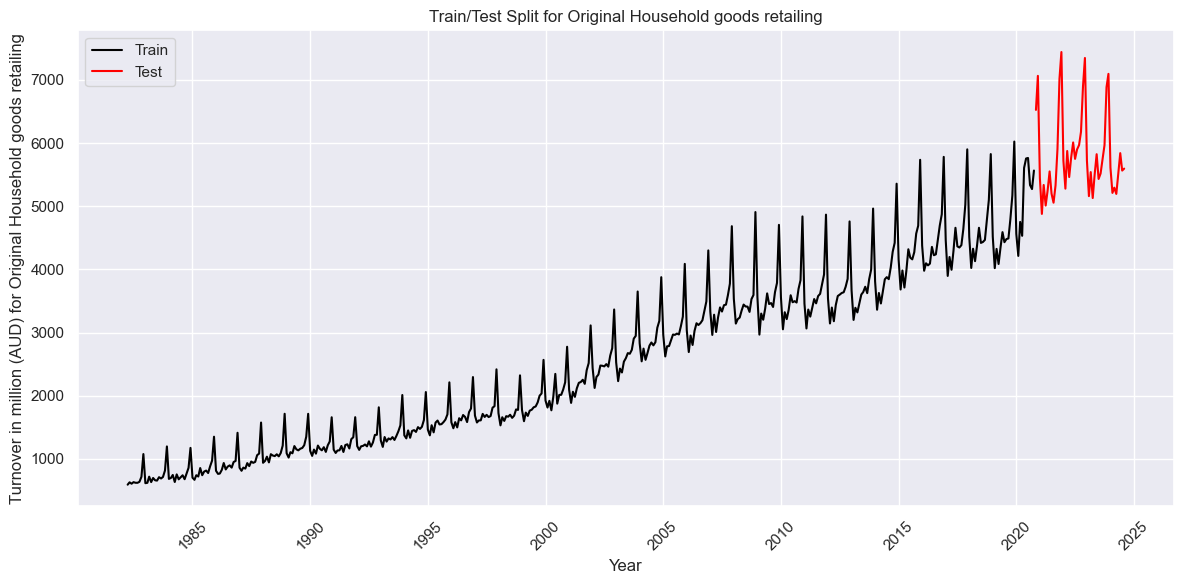

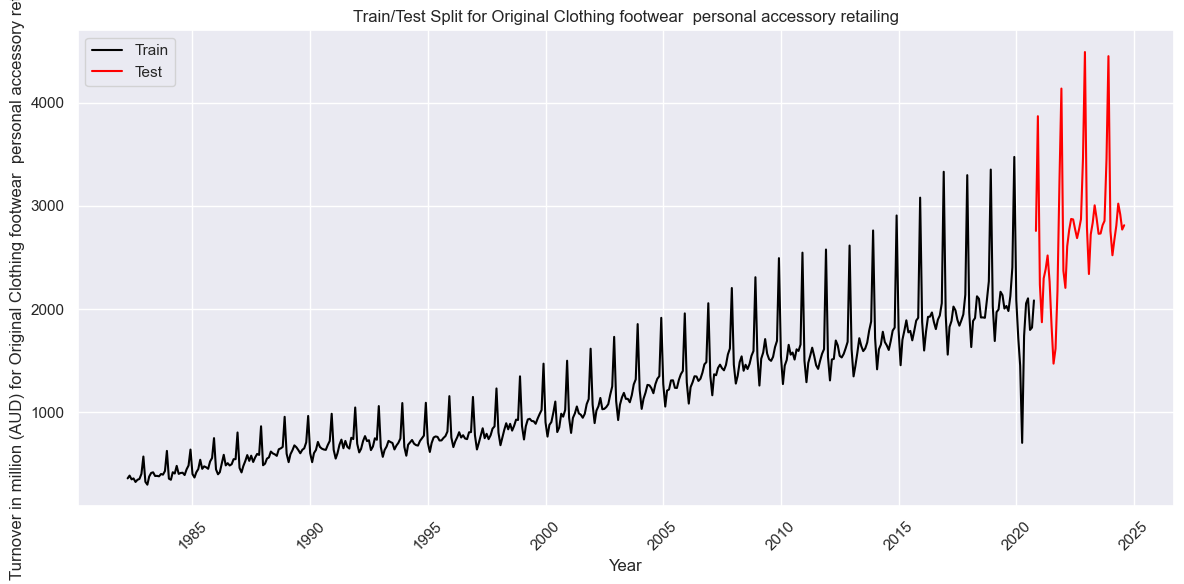

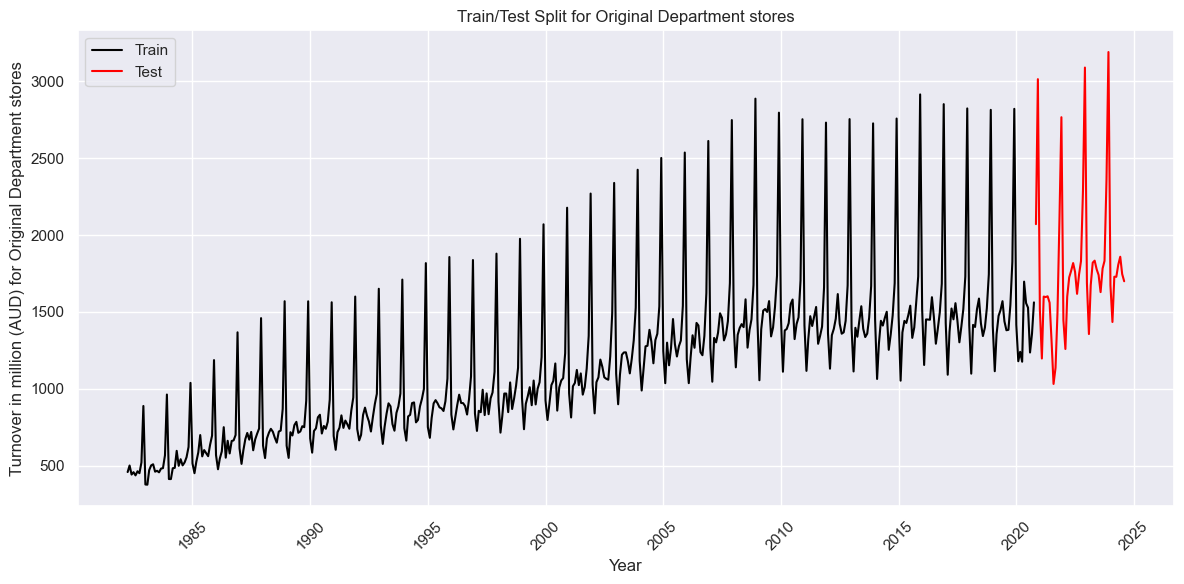

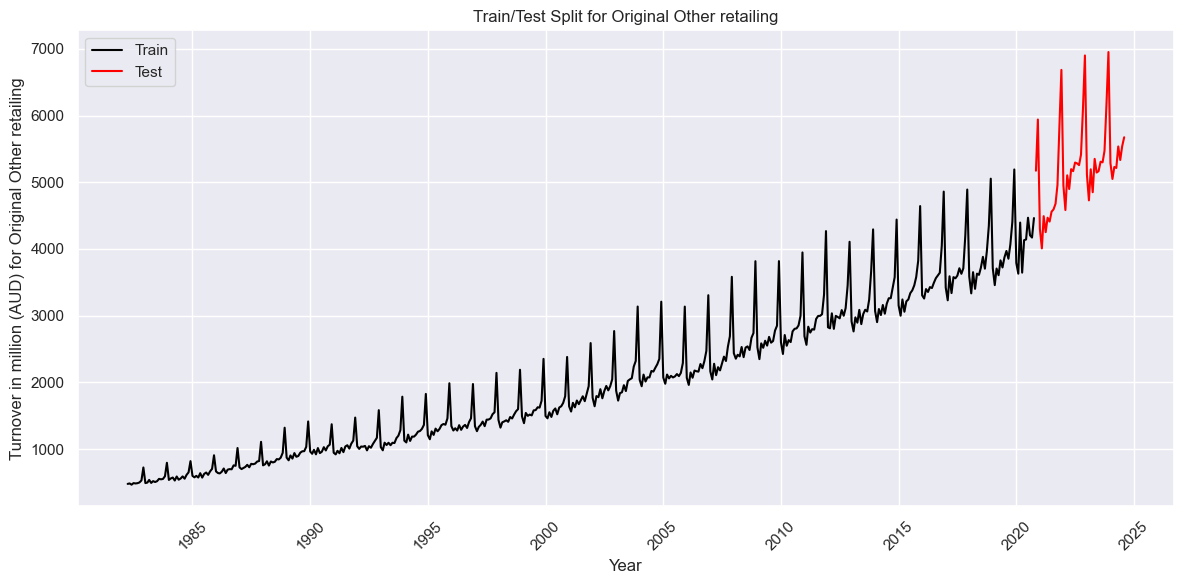

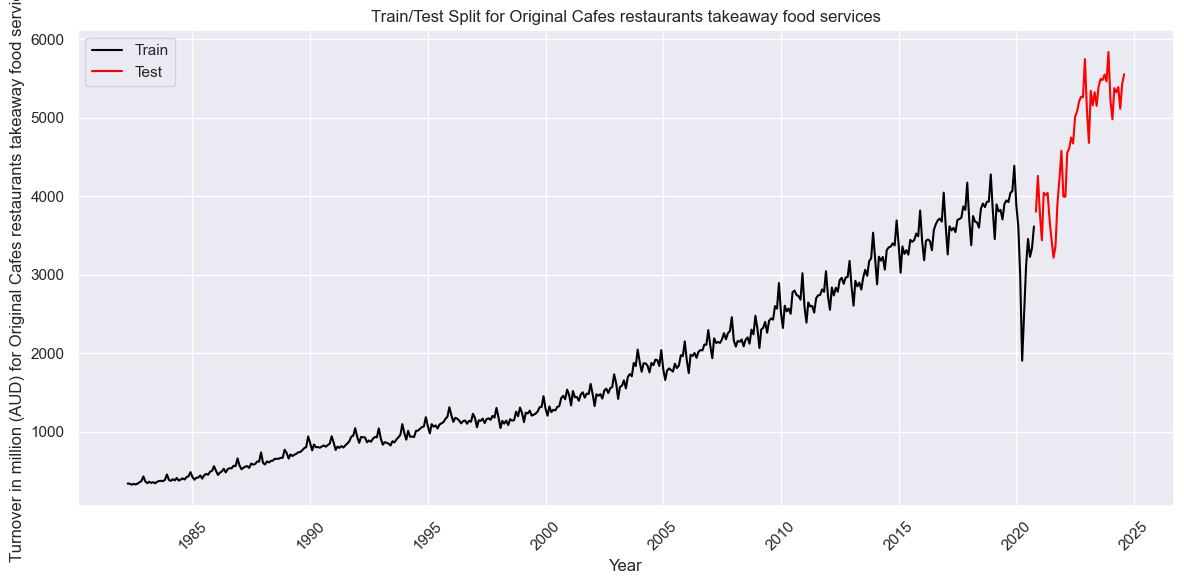

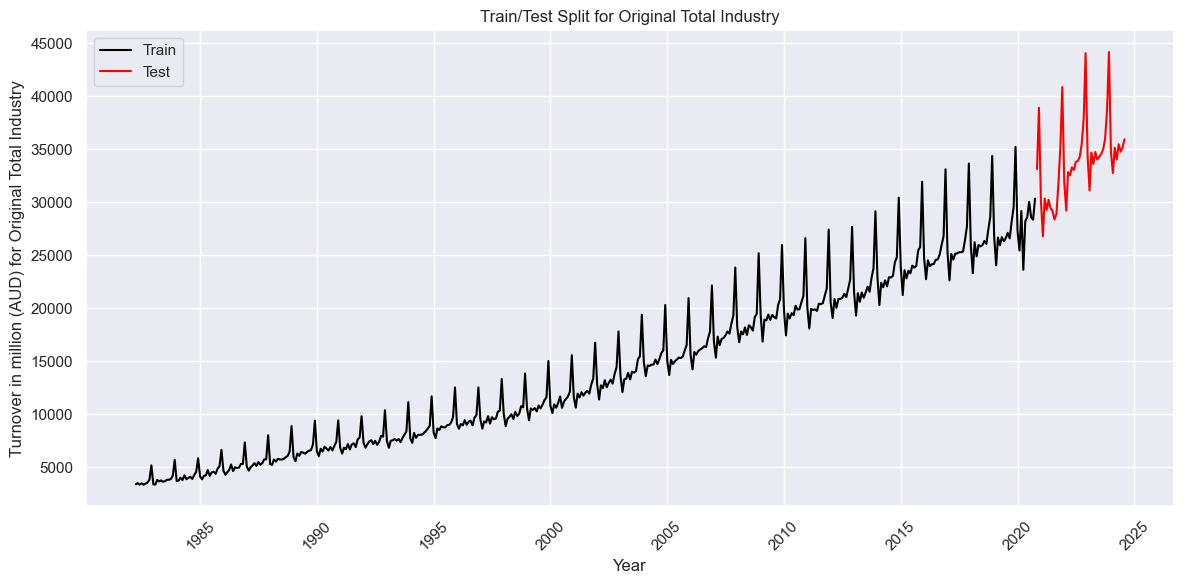

Plots saved successfully in the 'Plots' directory.


In [ ]:
import os

# List of categories to plot
categories = [
    'Original_Food_retailing',
    'Original_Household_goods_retailing',
    'Original_Clothing_footwear__personal_accessory_retailing',
    'Original_Department_stores',
    'Original_Other_retailing',
    'Original_Cafes_restaurants_takeaway_food_services',
    'Original_Total_Industry'
]

# Create the Plots directory if it doesn't exist
os.makedirs('Plots', exist_ok=True)

# Splitting the data into training and testing sets
train = new_df[new_df.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = new_df[new_df.index >= pd.to_datetime("2020-11-01", format='%Y-%m-%d')]

# Loop through each category to create and save plots
for category in categories:
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

    plt.plot(train.index, train[category], color="black", label='Train')
    plt.plot(test.index, test[category], color="red", label='Test')

    plt.ylabel(f'Turnover in million (AUD) for {category.replace("_", " ")}')
    plt.xlabel('Year')
    plt.xticks(rotation=45)
    plt.title(f"Train/Test Split for {category.replace('_', ' ')}")
    plt.legend()  # Show legend to differentiate train/test
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

    # Save the figure
    plt.savefig(f'Plots/{category}.png')  # Save as PNG in the Plots folder
    plt.close()  # Close the figure to free memory

print("Plots saved successfully in the 'Plots' directory.")

### Autoregressive Moving Average (ARMA) Model
The term “autoregressive” in ARMA means that the model uses past values to predict future ones. Specifically, predicted values are a weighted linear combination of past values. This type of regression method is similar to linear regression, with the difference being that the feature inputs here are historical values.

Moving average refers to the predictions being represented by a weighted, linear combination of white noise terms, where white noise is a random signal. The idea here is that ARMA uses a combination of past values and white noise in order to predict future values.

We can define an ARMA model using the SARIMAX package:

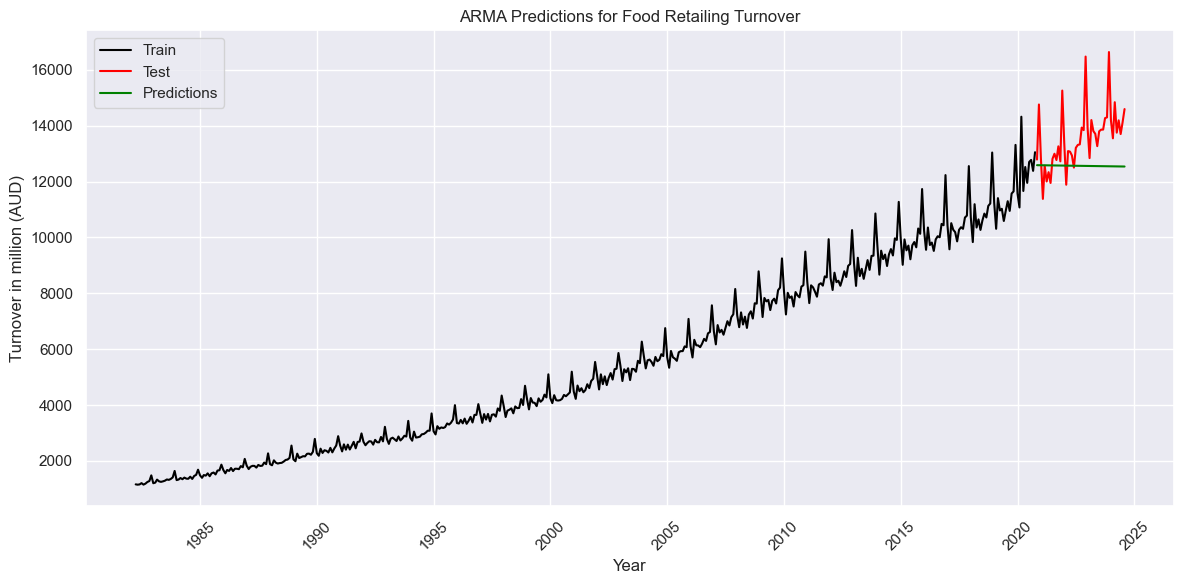

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the output
y = train['Original_Food_retailing']

# Define ARMA Model
ARMAmodel = SARIMAX(y, order=(1, 0, 1))
ARMAmodel_fit = ARMAmodel.fit(disp=False)

# Generate Turnover predictions
y_pred = ARMAmodel_fit.get_forecast(len(test))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"] = ARMAmodel_fit.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

# Align the index with test data
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

# Plot the Results
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.plot(train.index, train['Original_Food_retailing'], label='Train', color='black')
plt.plot(test.index, test['Original_Food_retailing'], label='Test', color='red')
plt.plot(y_pred_out.index, y_pred_out, color='green', label='Predictions')

# Labels and Title
plt.ylabel('Turnover in million (AUD)')
plt.xlabel('Year')
plt.title('ARMA Predictions for Food Retailing Turnover')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Evaluate the performance using the root mean-squared error

In [ ]:
arma_rmse = np.sqrt(mean_squared_error(test["Original_Food_retailing"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  1430.7452316856657


The RMSE is pretty high, which we could have guessed upon inspecting the plot. Unfortunately, the model predicts a decrease in price when the price actually increases. Again, ARMA is limited in that it fails for non-stationary time series and does not capture seasonality. Let’s see if we can improve performance with an ARIMA model.

### Autoregressive Integrated Moving Average (ARIMA) Model
An ARIMA task has three parameters. The first parameter corresponds to the lagging (past values), the second corresponds to differencing (this is what makes non-stationary data stationary), and the last parameter corresponds to the white noise (for modeling shock events).

RMSE:  929.8899391981538


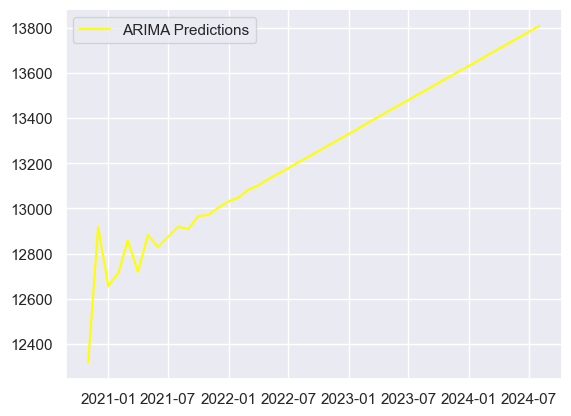

In [ ]:
# Import the ARIMA package from the stats library:
from statsmodels.tsa.arima.model import ARIMA

# Define an ARIMA model with order parameters (2,2,2):
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Original_Food_retailing"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

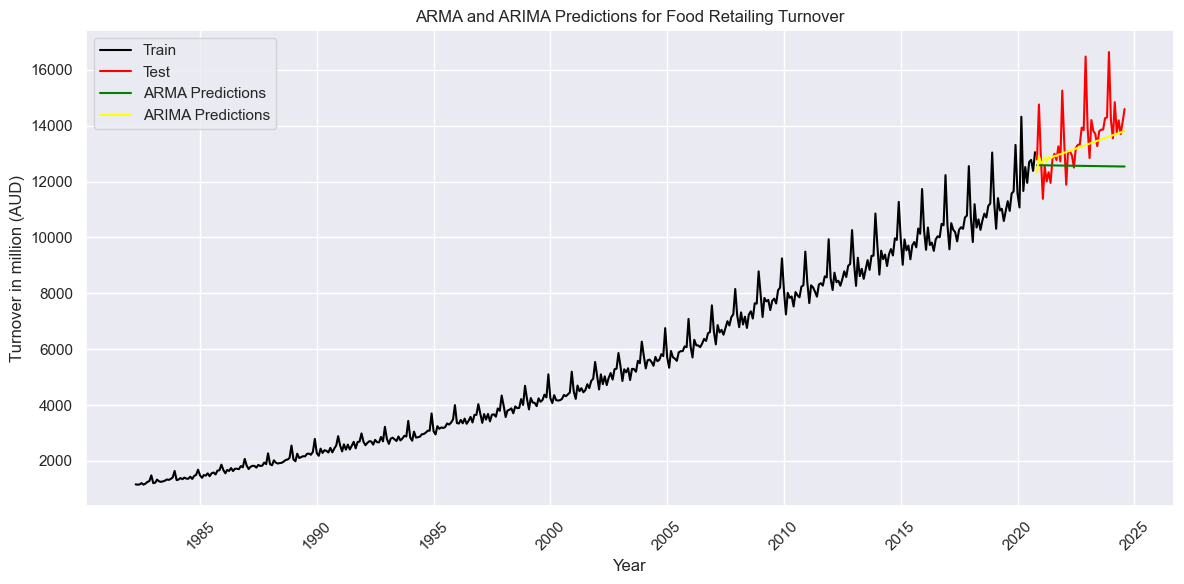

ARIMA RMSE:  929.8899391981538
ARMA RMSE:  1430.7452316856657


In [ ]:
# Define the output
y = train['Original_Food_retailing']

# Define ARMA Model
ARMAmodel = SARIMAX(y, order=(1, 0, 1))  # Adjust as necessary
ARMAmodel_fit = ARMAmodel.fit()

# Generate ARMA predictions
y_pred_arma = ARMAmodel_fit.get_forecast(len(test))
y_pred_arma_df = y_pred_arma.conf_int(alpha=0.05)
y_pred_arma_df["Predictions"] = ARMAmodel_fit.predict(start=y_pred_arma_df.index[0], end=y_pred_arma_df.index[-1])
y_pred_arma_df.index = test.index

# Define ARIMA Model
ARIMAmodel = ARIMA(y, order=(2, 2, 2))  # Adjust as necessary
ARIMAmodel_fit = ARIMAmodel.fit()

# Generate ARIMA predictions
y_pred_arima = ARIMAmodel_fit.get_forecast(len(test))
y_pred_arima_df = y_pred_arima.conf_int(alpha=0.05)
y_pred_arima_df["Predictions"] = ARIMAmodel_fit.predict(start=y_pred_arima_df.index[0], end=y_pred_arima_df.index[-1])
y_pred_arima_df.index = test.index

# Plotting
plt.figure(figsize=(12, 6))  # Adjust figure size

# Plot Train data
plt.plot(train.index, train['Original_Food_retailing'], label='Train', color='black')
# Plot Test data
plt.plot(test.index, test['Original_Food_retailing'], label='Test', color='red')
# Plot ARMA Predictions
plt.plot(y_pred_arma_df.index, y_pred_arma_df["Predictions"], color='green', label='ARMA Predictions')
# Plot ARIMA Predictions
plt.plot(y_pred_arima_df.index, y_pred_arima_df["Predictions"], color='yellow', label='ARIMA Predictions')

# Labels and Title
plt.ylabel('Turnover in million (AUD)')
plt.xlabel('Year')
plt.title('ARMA and ARIMA Predictions for Food Retailing Turnover')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Calculate RMSE for ARIMA
arima_rmse = np.sqrt(mean_squared_error(test["Original_Food_retailing"].values, y_pred_arima_df["Predictions"]))
print("ARIMA RMSE: ", arima_rmse)

# Calculate RMSE for ARMA
arma_rmse = np.sqrt(mean_squared_error(test["Original_Food_retailing"].values, y_pred_arma_df["Predictions"]))
print("ARMA RMSE: ", arma_rmse)

**Model Performance**

**ARIMA Model : RMSE: 929.89**
The ARIMA model shows a relatively lower root mean square error (RMSE) compared to the ARMA model, indicating better predictive accuracy in forecasting turnover for the food retailing category.

**ARMA Model : RMSE: 1430.75**
The ARMA model has a higher RMSE, suggesting it is less effective in capturing the underlying patterns in the data compared to the ARIMA model.

**Interpretation of RMSE**
RMSE is a commonly used metric for evaluating the accuracy of a predictive model. Lower values indicate a better fit to the data.

In this case:
The ARIMA model, with an RMSE of 929.89, demonstrates a stronger performance in predicting future turnover.
The ARMA model's higher RMSE indicates that it may not capture the time series dynamics as effectively as ARIMA, possibly due to its reliance on fewer parameters.

**Conclusion**
The ARIMA model is preferred for this dataset, as it provides more accurate predictions of food retailing turnover.
Further analysis could explore model tuning, additional features, or alternative models to potentially improve accuracy even further.

**Recommendations**
Consider examining the residuals of both models to check for patterns that might suggest further improvements.
Explore other forecasting techniques, such as seasonal decomposition or machine learning models, for a more comprehensive analysis

### Step 5: Train and Evaluate NeuralProphet Model

In [ ]:
# Prepare data for NeuralProphet
neural_data = df[['year', 'Original_Food_retailing']].rename(columns={'year': 'ds', 'Original_Food_retailing': 'y'})

# Create and train NeuralProphet model
model = NeuralProphet()
model.fit(neural_data, freq='Y')

# Future dataframe for predictions
future = model.make_future_dataframe(neural_data, periods=12)  # Next 12 months
forecast = model.predict(future)

print(forecast[['ds', 'y', 'yhat1']])  # 'yhat1' contains the forecasted values

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.804]% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency Y is different than major frequency MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 140


Training: |                                                                                       | 0/? [00:00…

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (16) is too small than the required number                     for the learning rate finder (219). The results might not be optimal.


Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: |                                                                                       | 0/? [00:00…

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.804]% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency Y is different than major frequency MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency Y corresponds to 91.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y
INFO - (NP.df_utils._infer_frequency) - Major frequency Y corresponds to 91.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - Y


Predicting: |                                                                                     | 0/? [00:00…

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


           ds     y         yhat1
0  2024-12-31  None  14590.472656
1  2025-12-31  None  15078.120117
2  2026-12-31  None  15565.836914
3  2027-12-31  None  16053.557617
4  2028-12-31  None  16548.164062
5  2029-12-31  None  17035.771484
6  2030-12-31  None  17523.449219
7  2031-12-31  None  18011.244141
8  2032-12-31  None  18505.923828
9  2033-12-31  None  18993.529297
10 2034-12-31  None  19481.208984
11 2035-12-31  None  19969.005859


**NeuralProphet Analysis Summary**
The NeuralProphet model was trained to forecast the turnover for "Original Food Retailing" based on historical data. The following outcomes were observed for the predicted values over the next 12 years:

The NeuralProphet model was trained to forecast the turnover for "Original Food Retailing" based on historical data. The following outcomes were observed for the predicted values over the next 12 years.

**Key Insights:**
- **Forecast Range:** The model provides predictions for the years 2024 through 2035.
- **Gradual Increase**: The predicted turnover shows a consistent upward trend, with values rising from approximately 14,590.47 million AUD in 2024 to about 19,969.01 million AUD by 2035.

- **Missing Actual Values:** The actual turnover values (y) for the forecasted years are marked as None, indicating that they were not available for comparison against the predictions.
- **Model Performance:** While the predictions provide a trend, it is important to validate the model against actual future data when available to assess accuracy and adjust the model accordingly.

**Conclusion:**
The NeuralProphet model forecasts a steady growth in food retail turnover, suggesting a positive outlook for this category over the next decade. Monitoring actual outcomes against these predictions will be crucial for evaluating model effectiveness and making informed business decisions.



In [ ]:
# Prepare data for NeuralProphet
# Ensure your 'year' column is in datetime format
df['year'] = pd.to_datetime(df['year'], format='%b-%Y')  # Adjust format as necessary

# Create a new DataFrame for NeuralProphet
neural_data = df[['year', 'Original_Food_retailing']].rename(columns={'year': 'ds', 'Original_Food_retailing': 'y'})

# Create and train NeuralProphet model
model = NeuralProphet(
    yearly_seasonality=True,  # Enable yearly seasonality
    weekly_seasonality=False,  # Disable if not needed
    daily_seasonality=False,   # Disable if not needed
    epochs=140,                # Adjust as needed
    batch_size=32              # Adjust as needed
)

# Fit the model with the frequency set based on your data
model.fit(neural_data, freq='M')  # Use 'M' for monthly frequency, adjust if necessary

# Create a future DataFrame for predictions
future = model.make_future_dataframe(neural_data, periods=120)  # Predict for the next 12 months

# Generate predictions
forecast = model.predict(future)

# Display relevant columns
print(forecast[['ds', 'y', 'yhat1']])  # 'yhat1' contains the forecasted values

# Optionally, plot the results
model.plot(forecast)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.804]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.


Training: |                                                                                       | 0/? [00:00…

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (16) is too small than the required number                     for the learning rate finder (219). The results might not be optimal.


Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: |                                                                                       | 0/? [00:00…

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.804]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.167]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.167]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: |                                                                                     | 0/? [00:00…

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.


            ds     y         yhat1
0   2024-09-01  None  14207.588867
1   2024-10-01  None  14491.190430
2   2024-11-01  None  14543.809570
3   2024-12-01  None  15634.083984
4   2025-01-01  None  14595.157227
..         ...   ...           ...
115 2034-04-01  None  18870.351562
116 2034-05-01  None  18961.296875
117 2034-06-01  None  18752.562500
118 2034-07-01  None  19049.808594
119 2034-08-01  None  19194.875000

[120 rows x 3 columns]
